# Does faculty salary vary by gender and/or rank?

## Set up

Before getting started, the only addtional library you should have to install (that did not come with the anaconda python distribution) is `seaborn`, a package for visualization:

```
pip install seaborn
```

Let's begin by reading in some data from [this course website](http://data.princeton.edu/wws509/datasets/#salary). Columns included are:

- **sx** = Sex, coded 1 for female and 0 for male
- **rk** = Rank, coded
    - 1 for assistant professor,
    - 2 for associate professor, and
    - 3 for full professor
- **yr** = Number of years in current rank
- **dg** = Highest degree, coded 1 if doctorate, 0 if masters
- **yd** = Number of years since highest degree was earned
- **sl** = Academic year salary, in dollars.

Before performing the statistical analysis here, you should run the `exploratory-analysis` file to get to know your data.

In [3]:
# Set up
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import urllib2 # to load data
from scipy.stats import ttest_ind # t-tests
import statsmodels.formula.api as smf # linear modeling
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline 

In [14]:
# Read data from URL
file = urllib2.urlopen('http://data.princeton.edu/wws509/datasets/salary.dat')
headers = file.next()
df = pd.DataFrame(l.rstrip().split() for l in file)
df.columns = headers.rstrip().split()
df['sl'] = df['sl'].astype(float) # Make sure salary is float
df['yr'] = df['yr'].astype(int) # Make sure year is int is float
df['yd'] = df['yd'].astype(int) # Make sure salary is float

## Simple linear regression: what is the salary increase associated with each additional year in your current position (`yr`)?

In [15]:
# Create a simple linear model that assesses the relationship between years in current position with salary
lm = smf.ols(formula='sl ~ yr', data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     48.22
Date:                Tue, 07 Feb 2017   Prob (F-statistic):           7.34e-09
Time:                        10:10:08   Log-Likelihood:                -507.38
No. Observations:                  52   AIC:                             1019.
Df Residuals:                      50   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.817e+04   1003.658     18.100      0.000      1.62e+04  2.02e+04
yr           752.7978    108.409      6.944      0.000       535.051   970.544
==============================================================================
Omnibus:                        5.716   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.015
Skew:                           0.509   Prob(JB):                       0.0815
Kurtosis:                       4.130   Cond. No.                         15.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assess the fit of your model:

- Describe the _accuracy of your coefficient estimates_. What are your interpretations of the **betas**, their **standard errors**, and their **confidence intervals** for your model?
- Describe the _accuracy of your model_. What is your interpretation of the **R-squared** value?

In [16]:
# Make predictions using the linear model
df['predictions'] = lm.predict()

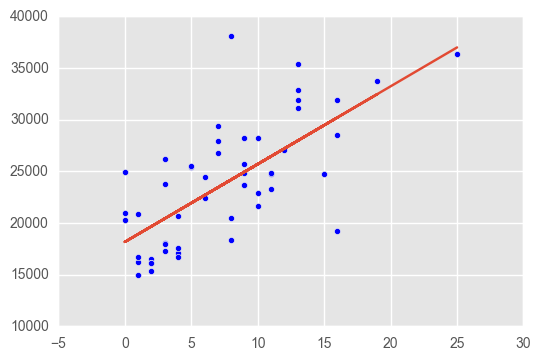

In [17]:
# Draw a scatterplot with your best fit line to show how well the model fits our data
plt.scatter(df.yr, df.sl)
plt.plot(df.yr, df.predictions)
plt.show()

## Multiple Regression

Predict using **multiple** independent variables

In [18]:
# Using multiple regression, create a linear model that uses *all* variables to estimate salary
lm_mult = smf.ols(formula='sl ~ yd + sx + rk + yr + dg', data=df).fit()
lm_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     44.24
Date:                Tue, 07 Feb 2017   Prob (F-statistic):           2.87e-17
Time:                        10:10:10   Log-Likelihood:                -474.72
No. Observations:                  52   AIC:                             963.4
Df Residuals:                      45   BIC:                             977.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        1.691e+04    816.442     20.715      0.000      1.53e+04  1.86e+04
sx[T.male]      -1166.3731    925.569     -1.260      0.214     -3030.565   697.818
rk[T.associate]  5292.3608   1145.398      4.621      0.000      2985.411  7599.311
rk[T.full]       1.112e+04   1351.772      8.225      0.000      8396.155  1.38e+04
dg[T.masters]    1388.6133   1018.747      1.363      0.180      -663.248  3440.475
yd               -124.5743     77.486     -1.608      0.115      -280.640    31.491
yr                476.3090     94.914      5.018      0.000       285.143   667.475
==============================================================================
Omnibus:                       26.102   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.617
Skew:                           1.462   Prob(JB):                     1.38e-12
Kurtosis:                       7.082   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assess the fit of your model:

- Describe the _accuracy of your coefficient estimates_. What are your interpretations of the **betas**, their **standard errors**, and their **confidence intervals** for your model?
- Describe the _accuracy of your model_. What is your interpretation of the **R-squared** value?

In [19]:
# Create predictions using this model
df['mult_preds'] = lm_mult.predict()

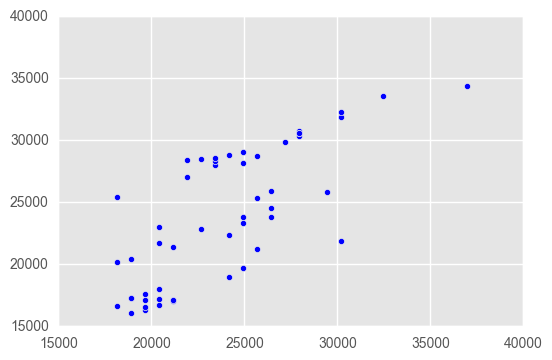

In [20]:
# How do our predictions compare to your earlier predications?
plt.scatter(df.predictions, df.mult_preds)

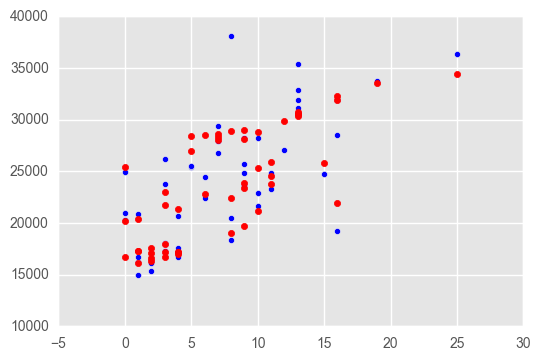

In [21]:
# Visually compare predictions over year
plt.scatter(df.yr, df.sl)
plt.scatter(df.yr, df.mult_preds, color='red')
plt.show()

## Compare models

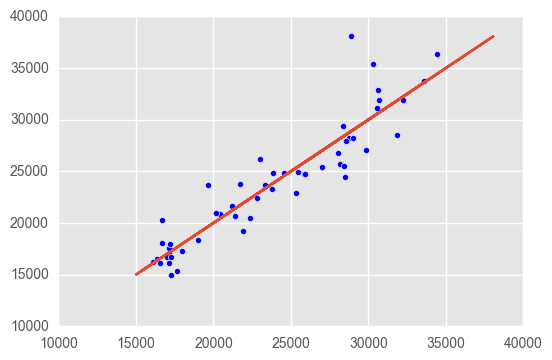

In [22]:
# Compare predictions to observations
plt.scatter(df.mult_preds, df.sl)
plt.plot(df.sl, df.sl)
plt.show()

In [23]:
# What are the r-squared values of the models?
print(lm.rsquared, lm_mult.rsquared) # explain the same amount of variance?

(0.49093702676921624, 0.85504057972251624)


## Predicting salary with only years since degree and sex

In [24]:
# Let's add a model that's just sex and years since graduation
lm_mult_sex_only = smf.ols(formula='sl ~ yd + sx', data=df).fit()
lm_mult_sex_only.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     23.83
Date:                Tue, 07 Feb 2017   Prob (F-statistic):           5.91e-08
Time:                        10:10:16   Log-Likelihood:                -507.27
No. Observations:                  52   AIC:                             1021.
Df Residuals:                      49   BIC:                             1026.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.578e+04   1438.330     10.973      0.000      1.29e+04  1.87e+04
sx[T.male]  2572.5343   1349.082      1.907      0.062      -138.548  5283.616
yd           380.6938     59.109      6.440      0.000       261.909   499.479
==============================================================================
Omnibus:                        3.822   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                2.919
Skew:                           0.368   Prob(JB):                        0.232
Kurtosis:                       3.897   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print(lm.rsquared, lm_mult_sex_only.rsquared)

(0.49093702676921624, 0.49304792719667834)


In [26]:
lm_mult_sex_only.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sl   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     23.83
Date:                Tue, 07 Feb 2017   Prob (F-statistic):           5.91e-08
Time:                        10:10:17   Log-Likelihood:                -507.27
No. Observations:                  52   AIC:                             1021.
Df Residuals:                      49   BIC:                             1026.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1.578e+04   1438.330     10.973      0.000      1.29e+04  1.87e+04
sx[T.male]  2572.5343   1349.082      1.907      0.062      -138.548  5283.616
yd           380.6938     59.109      6.440      0.000       261.909   499.479
==============================================================================
Omnibus:                        3.822   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                2.919
Skew:                           0.368   Prob(JB):                        0.232
Kurtosis:                       3.897   Cond. No.                         56.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

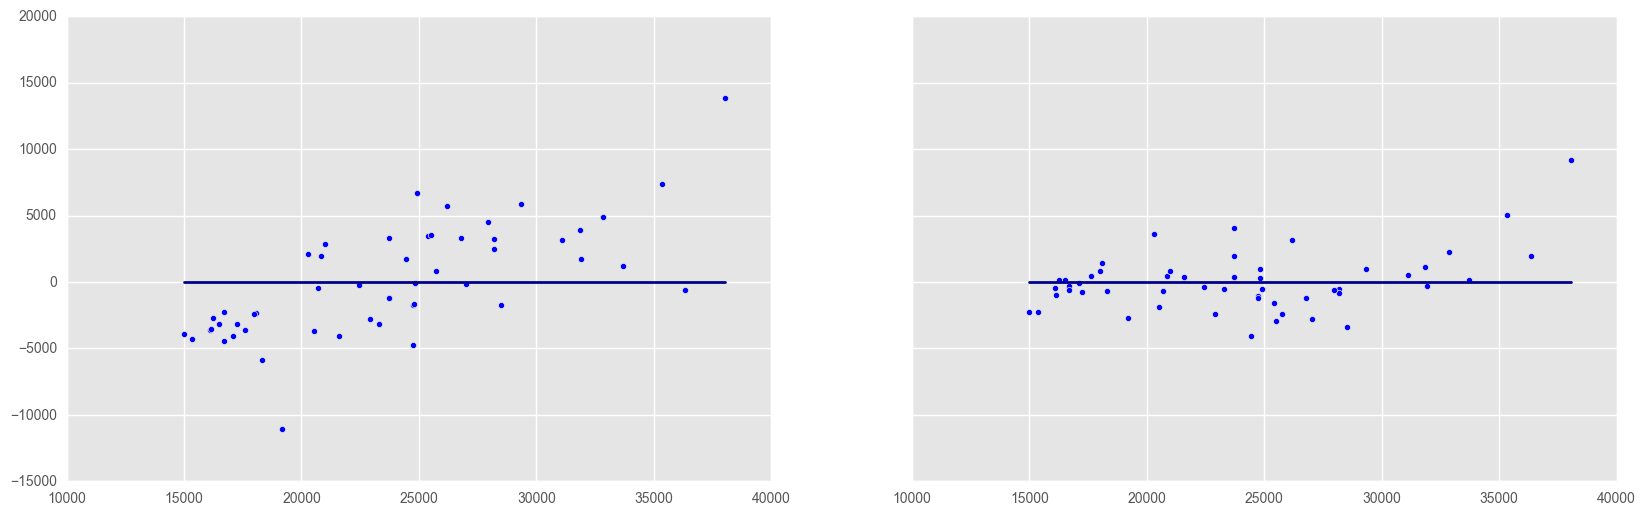

In [27]:
# Plot the residuals with a center line
df['lm_resids'] = df.sl - df.predictions
df['lm_mult_resids'] = df.sl - df.mult_preds
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 6))
ax1.scatter(df.sl, df.lm_resids)
ax1.plot((np.min(df.sl), np.max(df.sl)), (0,0),color='darkblue', lw=2)
ax2.scatter(df.sl, df.lm_mult_resids)
ax2.plot((np.min(df.sl), np.max(df.sl)), (0,0),color='darkblue', lw=2)
plt.show()

As shown above, the first model clearly **over predicts** low salaries and **under predicts** higher salaries. Clearly, we're missing something that **explains variation** besides the number of years. The second model has much less systematic error.